<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/07_adaboost_scratch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaboost scratch classification

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Generate a classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Scratch implementation of AdaBoost
class ScratchAdaBoostClassifier:
    def __init__(self, base_estimator, n_estimators=50):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples  # Initialize weights
        self.models = []
        self.alphas = []

        for _ in range(self.n_estimators):
            model = self.base_estimator()
            model.fit(X, y, sample_weight=weights)  # Fit with weighted data
            y_pred = model.predict(X)

            # Compute error rate
            err = np.sum(weights * (y_pred != y)) / np.sum(weights)

            # Stop if error is 0
            if err == 0:
                self.models.append(model)
                self.alphas.append(1)  # Large weight for perfect classifier
                break

            # Compute model weight (alpha)
            alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))
            self.models.append(model)
            self.alphas.append(alpha)

            # Update weights
            weights *= np.exp(-alpha * y * y_pred)
            weights /= np.sum(weights)  # Normalize

    def predict(self, X):
        # Aggregate predictions using weighted majority voting
        pred = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            pred += alpha * model.predict(X)
        return np.sign(pred)




Accuracy (Decision Tree): 0.6800
Accuracy (Scratch AdaBoost): 0.5800


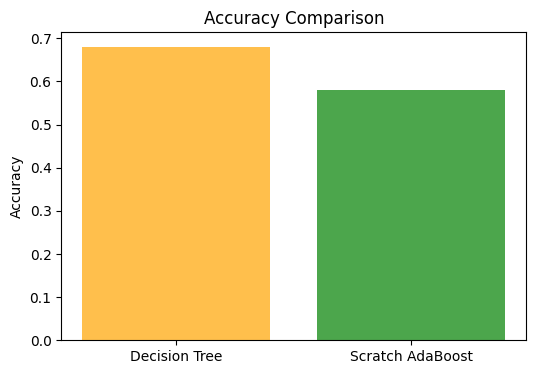

In [4]:
# Train Scratch AdaBoost
adaboost_scratch = ScratchAdaBoostClassifier(base_estimator=lambda: DecisionTreeClassifier(max_depth=1), n_estimators=50)
adaboost_scratch.fit(X_train, y_train)
y_pred_adaboost = adaboost_scratch.predict(X_test)

# Train a single Decision Tree Classifier for comparison
dt = DecisionTreeClassifier(random_state=42, max_depth=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

# Compare accuracy
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")
print(f"Accuracy (Scratch AdaBoost): {accuracy_adaboost:.4f}")

# Plot comparison of Decision Tree and AdaBoost predictions
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
models = ['Decision Tree', 'Scratch AdaBoost']
accuracies = [accuracy_dt, accuracy_adaboost]
ax.bar(models, accuracies, color=['orange', 'green'], alpha=0.7)
ax.set_title("Accuracy Comparison")
ax.set_ylabel("Accuracy")
plt.show()